In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from ALLCools.plot import *
from cemba_data.tools.integration.utilities import calculate_direct_confusion

In [17]:
mc_cell_tidy_data = pd.read_msgpack('Integration/mc_cell_tidy_data.with_integration_info.msg')
rna_cell_tidy_data = pd.read_msgpack('Integration/rna_cell_tidy_data.with_integration_info.msg')
cell_tidy_data = pd.read_msgpack('Integration/Integration_cell_tidy_data.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
cfm = calculate_direct_confusion(mc_cell_tidy_data[['SubType', 'co_cluster']], 
                                 rna_cell_tidy_data[['SubType', 'co_cluster']])

<Figure size 6000x3000 with 0 Axes>

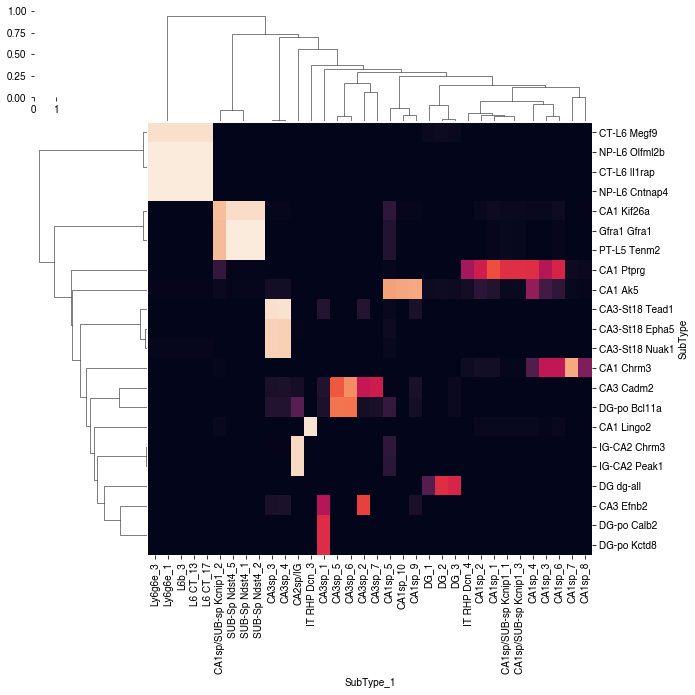

In [11]:
fig = plt.figure(figsize=(20, 10), dpi=300)

g = sns.clustermap(cfm, cbar=None)


DG dg-all              2491
CA1 Chrm3               836
CA1 Ptprg               546
CA3 Cadm2               239
CA1 Ak5                 124
CA1 Ptprg,CA1 Chrm3      76
CA3 St18                 73
CA1 Kif26a               26
IG-CA2                   20
Gfra1                    16
NP-L6                     9
DG-po                     9
NoMatch                   8
Name: SubTypeTomC, dtype: int64


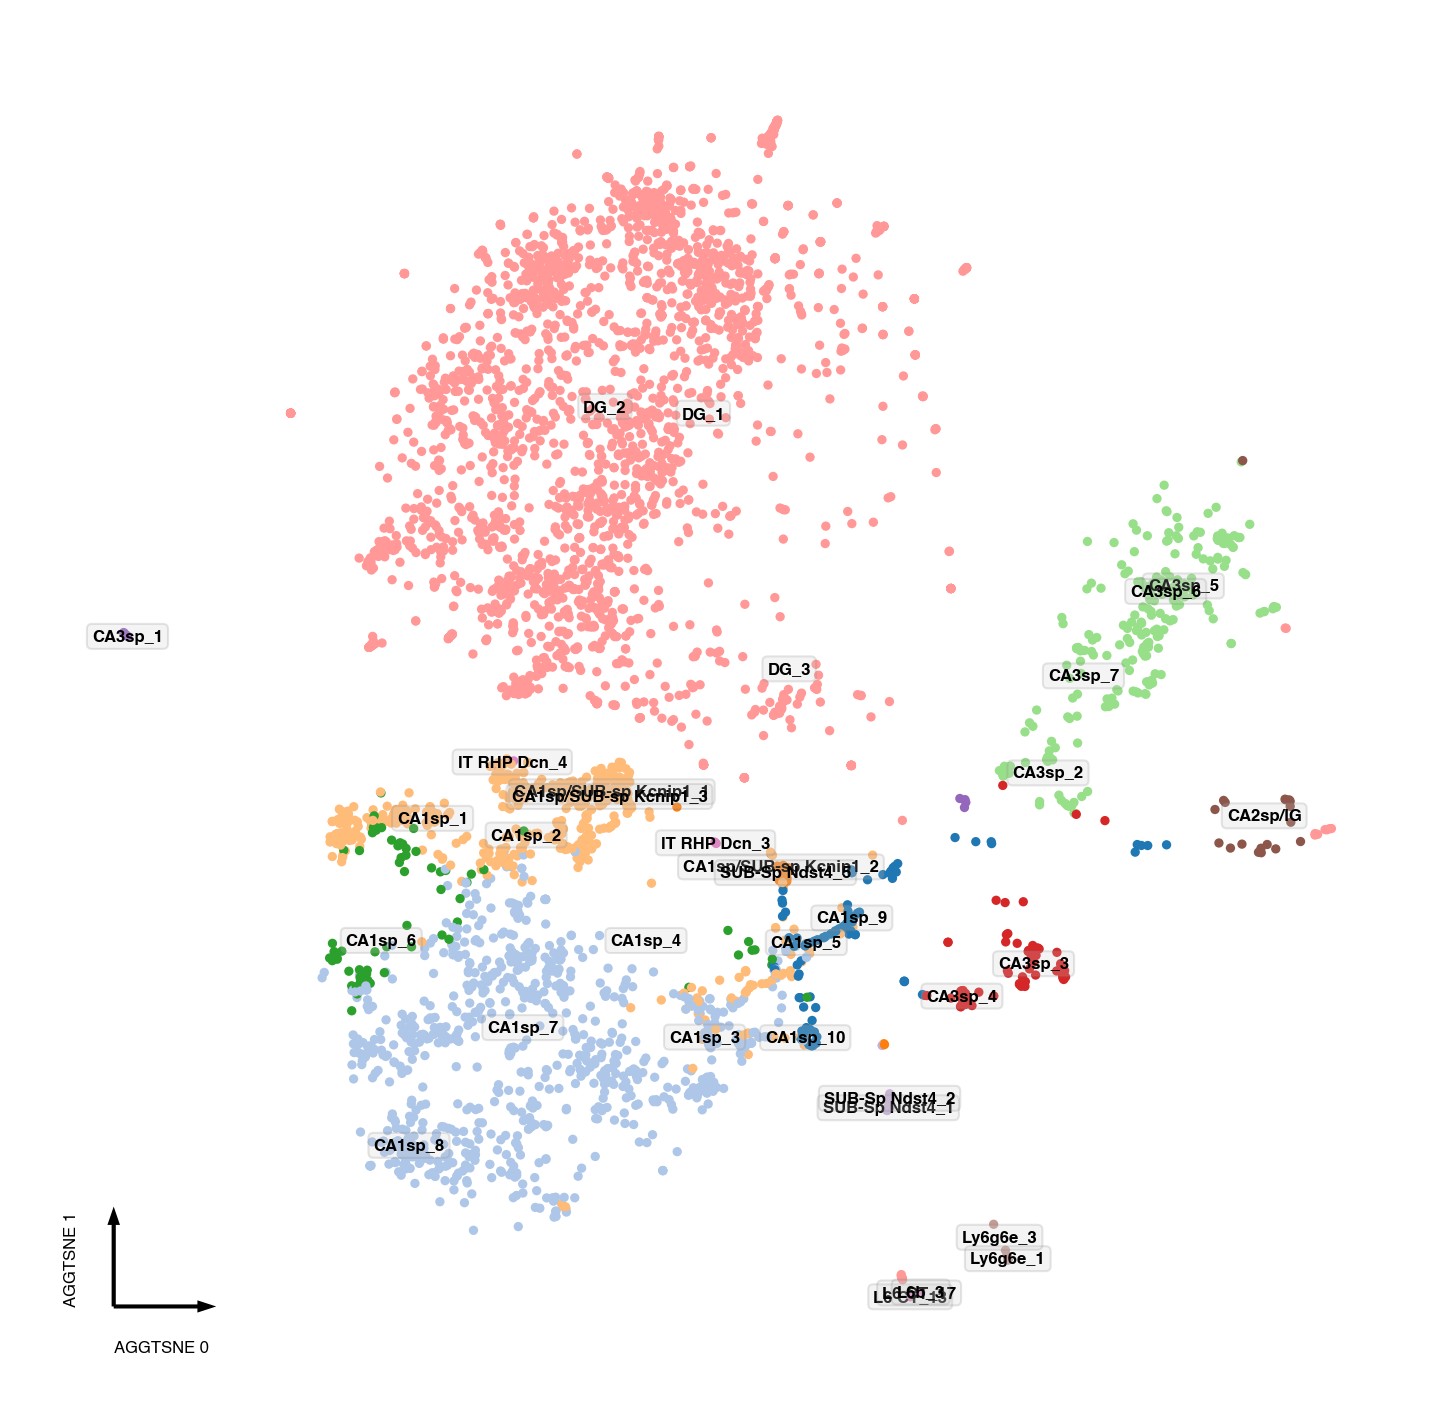

In [28]:
rna_to_mc = {'CA1sp/SUB-sp Kcnip1_1': 'CA1 Ptprg',
 'CA1sp/SUB-sp Kcnip1_2': 'CA1 Kif26a',
 'CA1sp/SUB-sp Kcnip1_3': 'CA1 Ptprg',
 'CA1sp_1': 'CA1 Ptprg',
 'CA1sp_10': 'CA1 Ak5',
 'CA1sp_2': 'CA1 Ptprg',
 'CA1sp_3': 'CA1 Chrm3',
 'CA1sp_4': 'CA1 Ptprg',
 'CA1sp_5': 'CA1 Ak5',
 'CA1sp_6': 'CA1 Ptprg,CA1 Chrm3',
 'CA1sp_7': 'CA1 Chrm3',
 'CA1sp_8': 'CA1 Chrm3',
 'CA1sp_9': 'CA1 Ak5',
 'CA2sp/IG': 'IG-CA2',
 'CA3sp_1': 'DG-po',
 'CA3sp_2': 'CA3 Cadm2',
 'CA3sp_3': 'CA3 St18',
 'CA3sp_4': 'CA3 St18',
 'CA3sp_5': 'CA3 Cadm2',
 'CA3sp_6': 'CA3 Cadm2',
 'CA3sp_7': 'CA3 Cadm2',
 'DG_1': 'DG dg-all',
 'DG_2': 'DG dg-all',
 'DG_3': 'DG dg-all',
 'IT RHP Dcn_3': 'NoMatch',
 'IT RHP Dcn_4': 'NoMatch',
 'L6 CT_13': 'NoMatch',
 'L6 CT_17': 'NoMatch',
 'L6b_3': 'NoMatch',
 'Ly6g6e_1': 'NP-L6',
 'Ly6g6e_3': 'NP-L6',
 'SUB-Sp Ndst4_1': 'Gfra1',
 'SUB-Sp Ndst4_2': 'Gfra1',
 'SUB-Sp Ndst4_5': 'CA1 Kif26a'}


rna_cell_tidy_data['SubTypeTomC'] = rna_cell_tidy_data['SubType'].map(rna_to_mc)
print(rna_cell_tidy_data['SubTypeTomC'].value_counts())
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=rna_cell_tidy_data,
                    hue='SubTypeTomC',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='SubType',
                    text_anno_kws=dict(fontsize=4))
pass

In [31]:
import collections
mc_to_rna = collections.defaultdict(list)

for k, v in rna_to_mc.items():
    mc_to_rna[v].append(k)
    
mc_to_rna = {k: ','.join(v) for k, v in mc_to_rna.items()}
for k, v in mc_to_rna.items():
    print(k, v, sep='\t')

CA1 Ptprg	CA1sp/SUB-sp Kcnip1_1,CA1sp/SUB-sp Kcnip1_3,CA1sp_1,CA1sp_2,CA1sp_4
CA1 Kif26a	CA1sp/SUB-sp Kcnip1_2,SUB-Sp Ndst4_5
CA1 Ak5	CA1sp_10,CA1sp_5,CA1sp_9
CA1 Chrm3	CA1sp_3,CA1sp_7,CA1sp_8
CA1 Ptprg,CA1 Chrm3	CA1sp_6
IG-CA2	CA2sp/IG
DG-po	CA3sp_1
CA3 Cadm2	CA3sp_2,CA3sp_5,CA3sp_6,CA3sp_7
CA3 St18	CA3sp_3,CA3sp_4
DG dg-all	DG_1,DG_2,DG_3
NoMatch	IT RHP Dcn_3,IT RHP Dcn_4,L6 CT_13,L6 CT_17,L6b_3
NP-L6	Ly6g6e_1,Ly6g6e_3
Gfra1	SUB-Sp Ndst4_1,SUB-Sp Ndst4_2


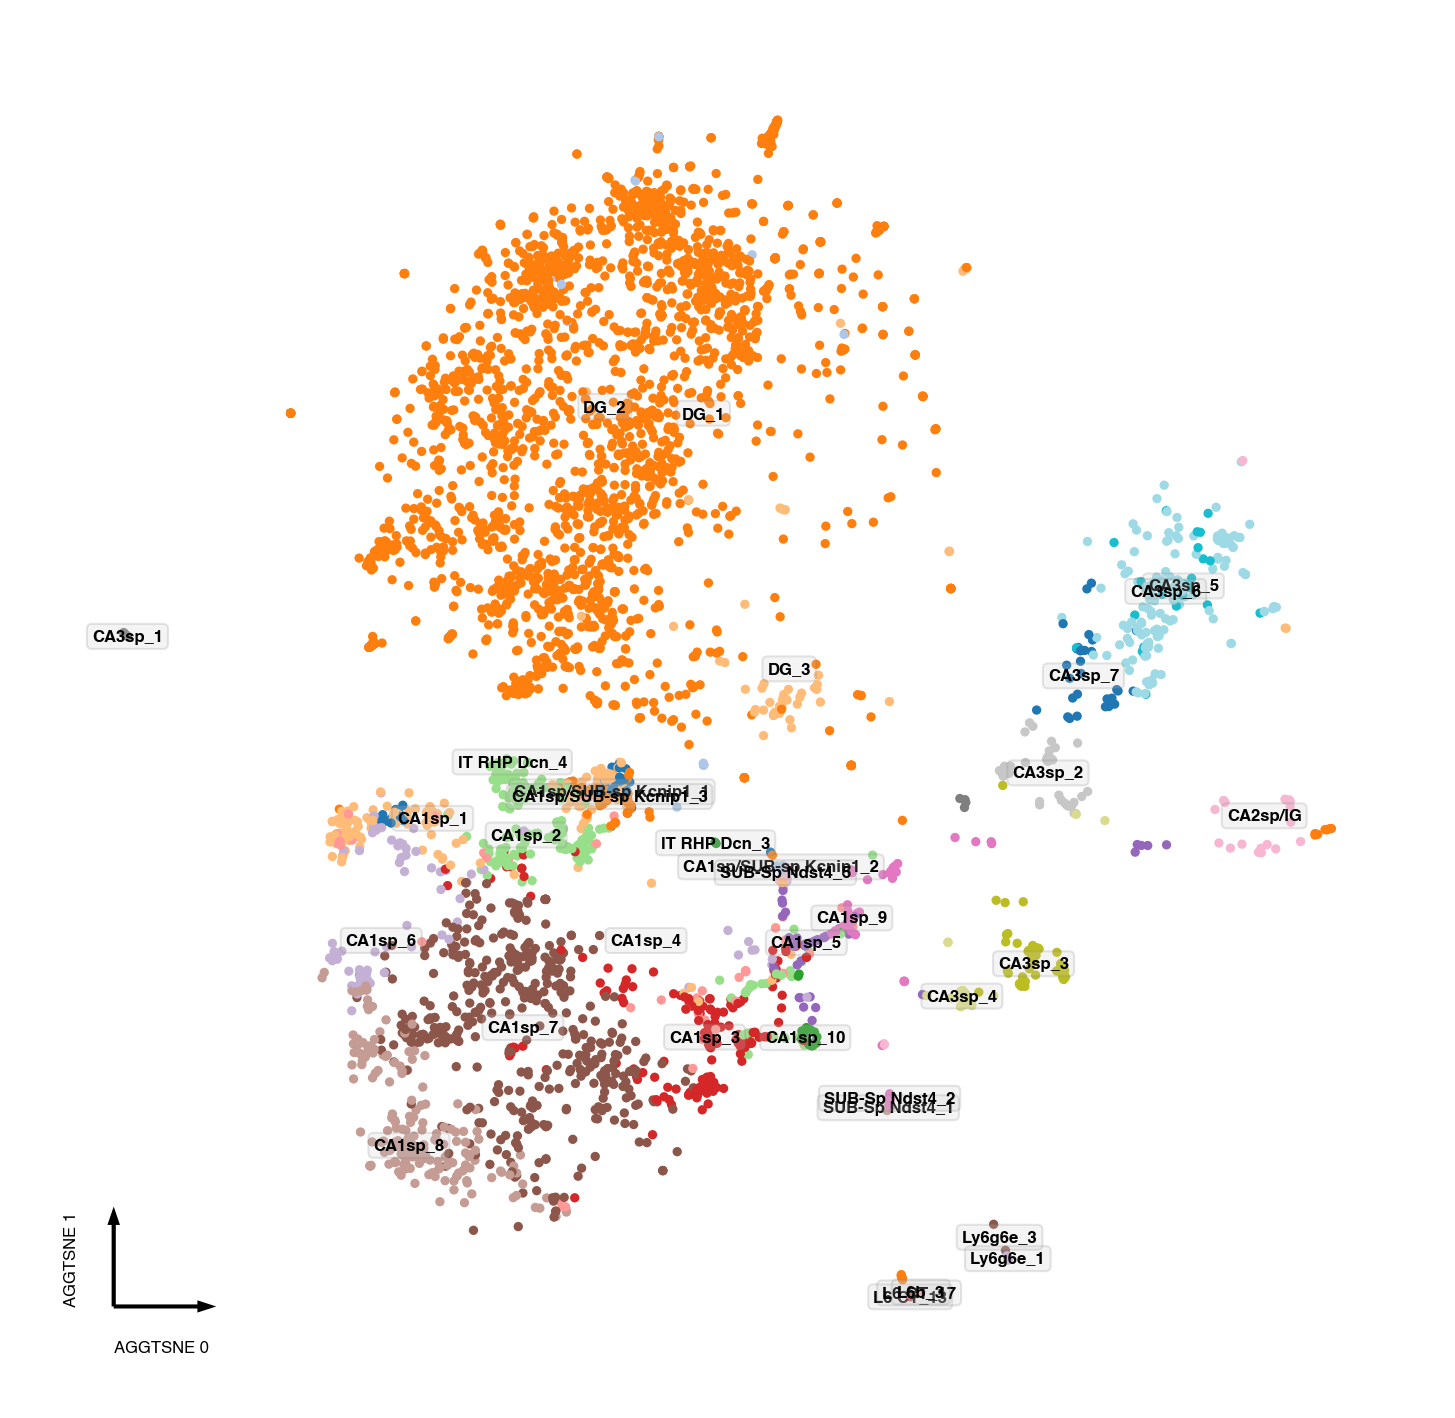

In [22]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=rna_cell_tidy_data,
                    hue='SubType',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='SubType',
                    text_anno_kws=dict(fontsize=4))
pass

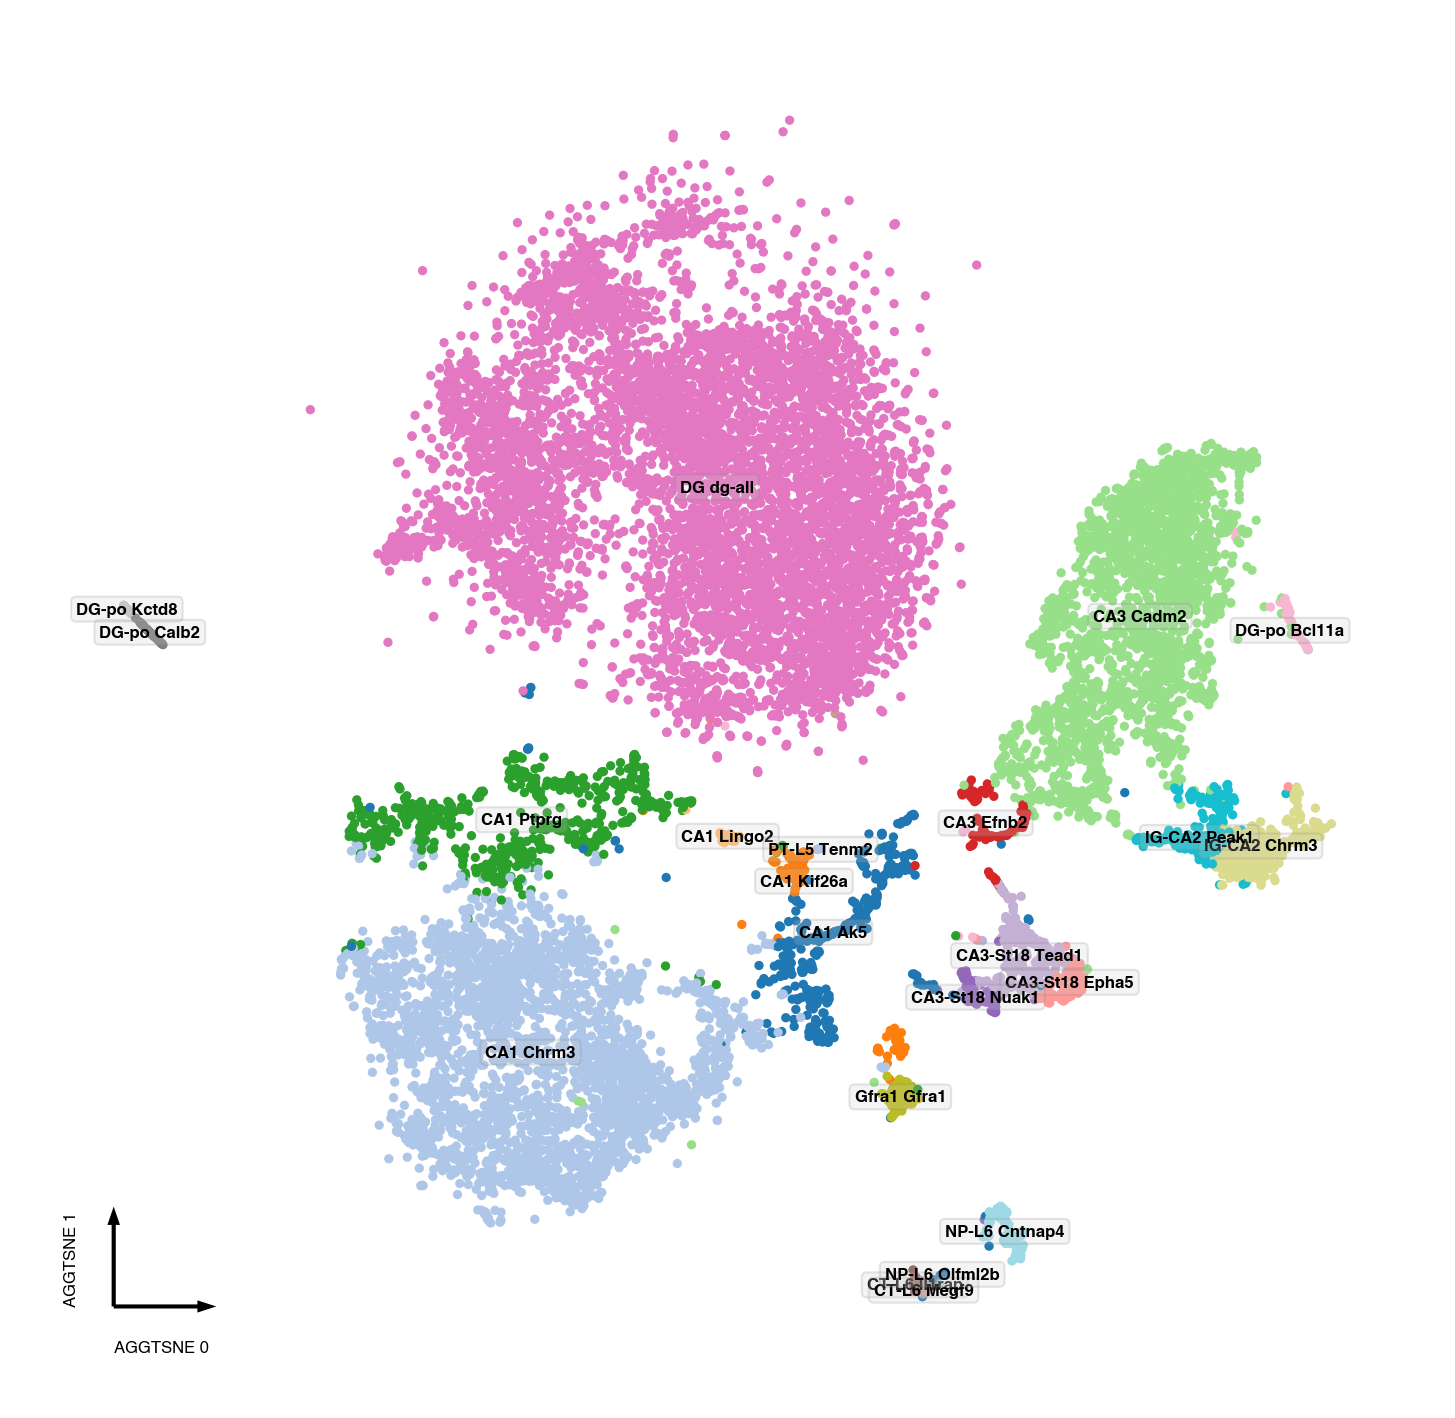

In [23]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=mc_cell_tidy_data,
                    hue='SubType',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='SubType',
                    text_anno_kws=dict(fontsize=4))
pass